In [32]:
import pandas as pd

load_frame = pd.read_csv('corn_not_corn%.csv',dtype={'year':int})
load_frame.index = pd.to_datetime(load_frame['year'],format='%Y')

In [ ]:
load_frame = load_frame.drop(['Unnamed: 0','year'],axis =1)

In [35]:
corn_frame = pd.DataFrame(index=load_frame.index.unique(),columns=load_frame['county_name'].unique())

In [68]:
load_frame_perc = load_frame[load_frame['commodity_desc']=='CORN'][['county_name','percent']]

In [79]:
for county in corn_frame.columns:
    corn_frame[county] = load_frame_perc[load_frame_perc['county_name'] == county]['percent']

In [85]:
corn_frame = corn_frame.interpolate()

In [132]:
from statsmodels.tsa.vector_ar.var_model import VAR
from matplotlib import pyplot as plt

train = corn_frame[:90]
valid = corn_frame[90:]

model = VAR(endog=train)
model_fit = model.fit()
prediction = model_fit.forecast(model_fit.endog,steps=len(valid))

pred = pd.DataFrame(prediction,index=corn_frame.index[90:],columns=corn_frame.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


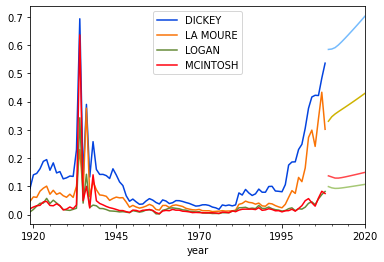

In [225]:
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

ax = train.plot(color={'DICKEY':'xkcd:blue','LA MOURE':'xkcd:orange','LOGAN':'xkcd:moss green','MCINTOSH':'xkcd:bright red'})
pred.plot(ax=ax,color={'DICKEY':'xkcd:sky blue','LA MOURE':'xkcd:mustard','LOGAN':'xkcd:light moss green','MCINTOSH':'xkcd:light red'},legend=False)
plt.show()